## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on credit card fraud detection. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussions section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time. 

### Credit Card Fraud Detection
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration
Load `creditcard_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('creditcard_train.csv') # load the data set 

In [3]:
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284657 entries, 0 to 284656
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284657 non-null  float64
 1   V1      284657 non-null  float64
 2   V2      284657 non-null  float64
 3   V3      284657 non-null  float64
 4   V4      284657 non-null  float64
 5   V5      284657 non-null  float64
 6   V6      284657 non-null  float64
 7   V7      284657 non-null  float64
 8   V8      284657 non-null  float64
 9   V9      284657 non-null  float64
 10  V10     284657 non-null  float64
 11  V11     284657 non-null  float64
 12  V12     284657 non-null  float64
 13  V13     284657 non-null  float64
 14  V14     284657 non-null  float64
 15  V15     284657 non-null  float64
 16  V16     284657 non-null  float64
 17  V17     284657 non-null  float64
 18  V18     284657 non-null  float64
 19  V19     284657 non-null  float64
 20  V20     284657 non-null  float64
 21  V21     28

In [5]:
# Each row is an transaction record. There are totally 284657 records.
# Columns represent 31 features of the transactions, including time, result of a Principal Component Analysis, amount, and class. 

In [6]:
data.isnull().sum() / data.shape[0]

Time      0.000000
V1        0.000000
V2        0.000000
V3        0.000000
V4        0.000000
V5        0.000000
V6        0.000000
V7        0.000000
V8        0.000000
V9        0.000000
V10       0.000000
V11       0.000000
V12       0.000000
V13       0.000000
V14       0.000000
V15       0.000000
V16       0.000000
V17       0.000000
V18       0.000000
V19       0.000000
V20       0.000000
V21       0.000000
V22       0.000977
V23       0.001827
V24       0.000000
V25       0.000000
V26       0.000000
V27       0.000000
V28       0.000000
Amount    0.000000
Class     0.000000
dtype: float64

In [7]:
# The missing values are in V22 & V23.
# The missing values are results of a Principal Component Analysis (PCA) transformation, which are hard to deal with due to confidentiality issues
# and the missing rate is relatively low.
# I would remove the missing values. 

In [8]:
data = data.dropna()

In [9]:
data.index = range(data.shape[0])

In [10]:
data.shape

(283859, 31)

In [11]:
# 798 observations are removed due to missingness, and 283859 observations remain for further analysis.

In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
(data < Q1 - 2.5 * IQR).sum() + (data > Q3 + 2.5 * IQR).sum()

Time          0
V1         2887
V2         6258
V3         1122
V4         1247
V5         3433
V6        12201
V7         4071
V8        13610
V9         1572
V10        4082
V11         181
V12        3510
V13          13
V14        3843
V15          67
V16        1141
V17        2300
V18         494
V19        1959
V20       16408
V21        8771
V22         349
V23       10131
V24         245
V25        1040
V26         608
V27       20850
V28       16038
Amount    21995
Class       442
dtype: int64

In [13]:
# The amount of outliers is shown above. 
# Since class for frauds is 1, and the amount of frauds is quite small compared with normal trasctions, they are considered as outliers. 
# Thus, I think we should not remove outliers for Class.

In [14]:
data_removed = data[(data > Q1 - 2.5 * IQR) & (data < Q3 + 2.5 * IQR)]
data_removed['Class'] = data['Class']
data_removed = data_removed.dropna()

In [15]:
data_removed.shape

(212553, 31)

In [16]:
# 71306 observations are removed due to outliers, and 212553 observations remain for further analysis.

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

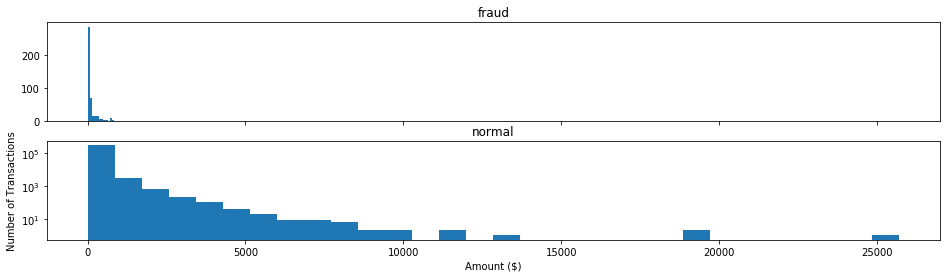

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(data["Amount"][data["Class"]== 1], bins = bins)
ax1.set_title('fraud')

ax2.hist(data["Amount"][data["Class"] == 0], bins = bins)
ax2.set_title('normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log') # due to the difference in the amount of transcations between fraud cases and normal cases
plt.show()

In [18]:
# The graph shows the transaction amount seperately for fraud cases and normal cases.
# We can conclude the transaction amount of fraud cases is smller than the transaction amount of normal cases

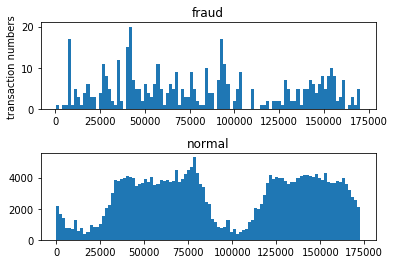

In [19]:
plt.subplot(2, 1, 1)
plt.hist(data.Time[data.Class == 1], bins=100)
plt.title('fraud')
plt.ylabel('transaction numbers')
 
plt.subplot(2, 1, 2)
plt.hist(data.Time[data.Class == 0], bins=100)
plt.title('normal')
plt.subplots_adjust(wspace =0, hspace =0.5) # adjust the spacing 

In [20]:
# The graph shows the time seperately for fraud cases and normal cases.
# We can conclude the time for fraud cases are more random, and there are two peaks for normal cases.
# The randomness of time for fraud cases may due to the relatively small sample size.

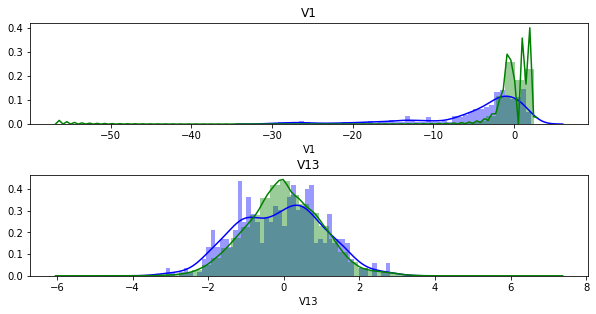

In [21]:
plt.figure(figsize=(10,80))
gs = gridspec.GridSpec(29, 1)
dfv = data.iloc[:,1:29]

for i, cn in enumerate(['V1', 'V13']):
    ax = plt.subplot(gs[i])
    sns.distplot(dfv[cn][data.Class == 1], bins=50, color='blue')
    sns.distplot(dfv[cn][data.Class == 0], bins=50, color='green')
    ax.set_title(str(cn))
plt.subplots_adjust(wspace =0, hspace =0.5)

In [22]:
# The graph shows the some results of a Principal Component Analysis (PCA) transformation seperately for fraud cases and normal cases.
# The fraud cases is blue, and the normal cases is green. 
# Fraud cases and normal cases have similar distributions for V8, V13, V15, V20, V21, V22, V23, V24, V25, V26, V27 and V28, and different distributions for other results of a Principal Component Analysis (PCA) transformation. 

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

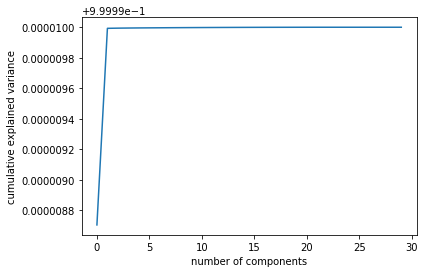

In [23]:
df = data_removed.iloc[:, 0:30] #features
target = data_removed.iloc[:, 30]
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [24]:
# From the graph, we can see about 2 components describe close to 100% of the variance

In [25]:
pca = PCA(n_components=2)
projected = pca.fit_transform(df)

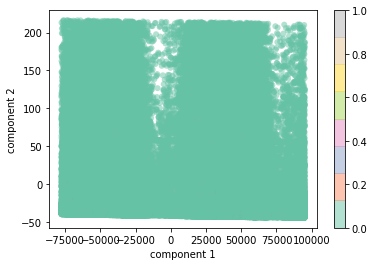

In [26]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=target, edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('Set2'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [27]:
# The stretch and rotation in 30-dimensional space allow us to present the features in two dimensions, and it is in an unsupervised manner without reference to the labels.

### Module 4: Classification
Choose three classification methods and build classification models, using 5-fold cross-validation. <br>

Further, load `creditcard_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix. <br>

Hint: because the dataset is highly unbalanced, consider undersampling, i.e. randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples for model fitting and training. 

In [28]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [29]:
test = pd.read_csv('creditcard_test.csv') #import test data set 

In [30]:
fraud_index = np.array(data[data.Class == 1].index)
norm_index = np.array(data[data.Class == 0].index)
random_norm_index = np.random.choice(norm_index,len(fraud_index),replace = False)
under_sample_index = np.concatenate((fraud_index,random_norm_index),axis=0)
under_sample = data.iloc[under_sample_index] #undersampling
X_train_undersample = under_sample.iloc[:, 0:30]
y_train_undersample = under_sample.iloc[:, 30]
X_test_undersample = test.iloc[:, 0:30]
y_test_undersample = test.iloc[:, 30]

In [31]:
# Logistic Regression Model
LR_params = {'C': [0.001, 0.0001]}
grid_LR = GridSearchCV(estimator = LogisticRegression(), 
                  param_grid = LR_params, 
                  cv = 5) #5-fold cross-validation
grid_LR.fit(X_train_undersample, y_train_undersample)
LR = grid_LR.best_estimator_.fit(X_train_undersample, y_train_undersample)
LR_pred = LR.predict(X_test_undersample)

In [32]:
# Scores of Logistic Regression Model
print(classification_report(y_test_undersample,LR_pred))
print('Accuracy score : ', LR.score(X_test_undersample, y_test_undersample))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       100
           1       0.98      0.82      0.89        50

    accuracy                           0.93       150
   macro avg       0.95      0.91      0.92       150
weighted avg       0.94      0.93      0.93       150

Accuracy score :  0.9333333333333333


Confusion matrix:  [[99  1]
 [ 9 41]]


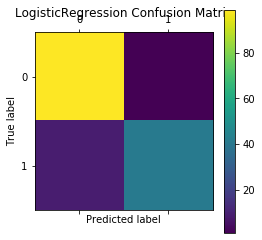

In [33]:
# Confusion matraix of Logistic Regression Model
LRcm = confusion_matrix(y_test_undersample, LR_pred)
print('Confusion matrix: ', LRcm)
plt.matshow(LRcm)
plt.title('LogisticRegression Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Text(0, 0.5, 'Recall')

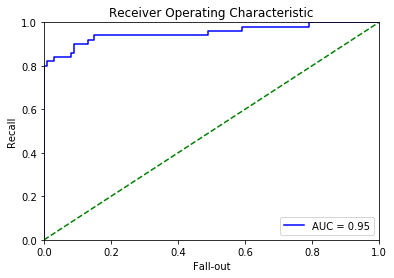

In [34]:
# ROC curve for Logistic Regression Model
predictions = LR.predict_proba(X_test_undersample)
FPrate, recall, thresholds = roc_curve(y_test_undersample, predictions[:, 1])
roc_auc = auc(FPrate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(FPrate, recall, 'b', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Fall-out')
plt.ylabel('Recall')

In [35]:
# Decision Tree Classifier
tree_params = {'max_depth': range(5, 30, 5),
              'min_samples_split': range(2, 10, 2), 
              'min_samples_leaf': range(1, 6, 2)}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5)#5-fold cross-validation
grid_tree.fit(X_train_undersample, y_train_undersample)
tree = grid_tree.best_estimator_.fit(X_train_undersample, y_train_undersample)
tree_pred = tree.predict(X_test_undersample)

In [36]:
# Scores of Decision Tree Classifier
print(classification_report(y_test_undersample, tree_pred))
print('Accuracy: ', tree.score(X_test_undersample, y_test_undersample))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       100
           1       0.86      0.96      0.91        50

    accuracy                           0.93       150
   macro avg       0.92      0.94      0.93       150
weighted avg       0.94      0.93      0.93       150

Accuracy:  0.9333333333333333


Confusion matrix:  [[92  8]
 [ 2 48]]


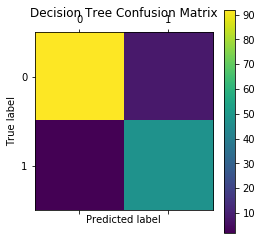

In [37]:
# Confusion matraix of Decision Tree
LRcm = confusion_matrix(y_test_undersample, tree_pred)
print('Confusion matrix: ', LRcm)
plt.matshow(LRcm)
plt.title('Decision Tree Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Text(0, 0.5, 'Recall')

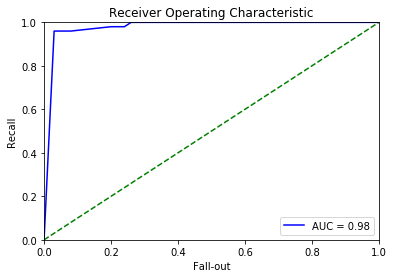

In [38]:
# ROC curve for Decision Tree
predictions = tree.predict_proba(X_test_undersample)
FPrate, recall, thresholds = roc_curve(y_test_undersample, predictions[:, 1])
roc_auc = auc(FPrate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(FPrate, recall, 'b', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Fall-out')
plt.ylabel('Recall')

In [39]:
# Random Forest Classifier
forest_params = {'max_depth':[5, 10], 
                'min_samples_leaf': [1, 5],
                'n_estimators': range(80, 140, 20)}
grid_forest = GridSearchCV(RandomForestClassifier(), forest_params, cv=5)#5-fold cross-validation
grid_forest.fit(X_train_undersample, y_train_undersample)
forest = grid_forest.best_estimator_.fit(X_train_undersample, y_train_undersample)
forest_pred = tree.predict(X_test_undersample)

In [40]:
# Scores of Random Forest Classifier
print(classification_report(y_test_undersample, forest_pred))
print('Accuracy: ', forest.score(X_test_undersample, y_test_undersample))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       100
           1       0.86      0.96      0.91        50

    accuracy                           0.93       150
   macro avg       0.92      0.94      0.93       150
weighted avg       0.94      0.93      0.93       150

Accuracy:  0.9733333333333334


Confusion matrix:  [[92  8]
 [ 2 48]]


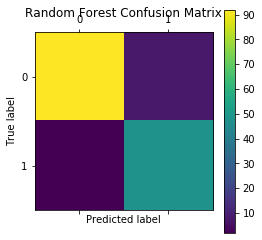

In [41]:
# Confusion matraix of Random Forest
LRcm = confusion_matrix(y_test_undersample, forest_pred)
print('Confusion matrix: ', LRcm)
plt.matshow(LRcm)
plt.title('Random Forest Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Text(0, 0.5, 'Recall')

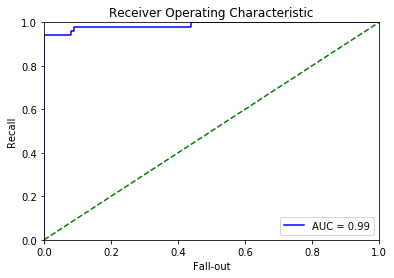

In [42]:
# ROC curve for Random Forest
predictions = forest.predict_proba(X_test_undersample)
FPrate, recall, thresholds = roc_curve(y_test_undersample, predictions[:, 1])
roc_auc = auc(FPrate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(FPrate, recall, 'b', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Fall-out')
plt.ylabel('Recall')

### Module 5: Summary
Summarize your findings and draw conclusions.

In [43]:
# 1.Around 8% of transaction data are outliers, showing the variance of data are quite big.
# 2.Some features of fraud cases and normal cases are too similar, which may be the interference for models to work properly.
# 3.The scores, including precision score, recall score and f1-score, of normal cases are higher that the scores of fraud cases for all models used above. It shows normal cases are easier to be detected properly.
# 4.Undersampling fixs the problem of highly unbalanced data. As you can see, the scores, including precision score, recall score and f1-score, of fraud cases are all above 90% for three models. Undersampling enables the model to detect fraud cases properly.
# 5.In general, Random Forest Classifier performs best among three models above. Its accuracy score is around 0.97, which is highest. The result of confusion matrix is as good as that of decision tree model. Its ROC curve is the best as well, as you can see from the graph above.